ADF p-value: 0.7862227282658312

Forecasted Sales:
         Date  Forecasted_Sales
0 2022-04-11        249.769630
1 2022-04-12        247.559959
2 2022-04-13        247.914554
3 2022-04-14        247.857651
4 2022-04-15        247.866783
5 2022-04-16        247.865317
6 2022-04-17        247.865552
7 2022-04-18        247.865515
8 2022-04-19        247.865521
9 2022-04-20        247.865520

RMSE: 14.23
MAPE: 4.92%


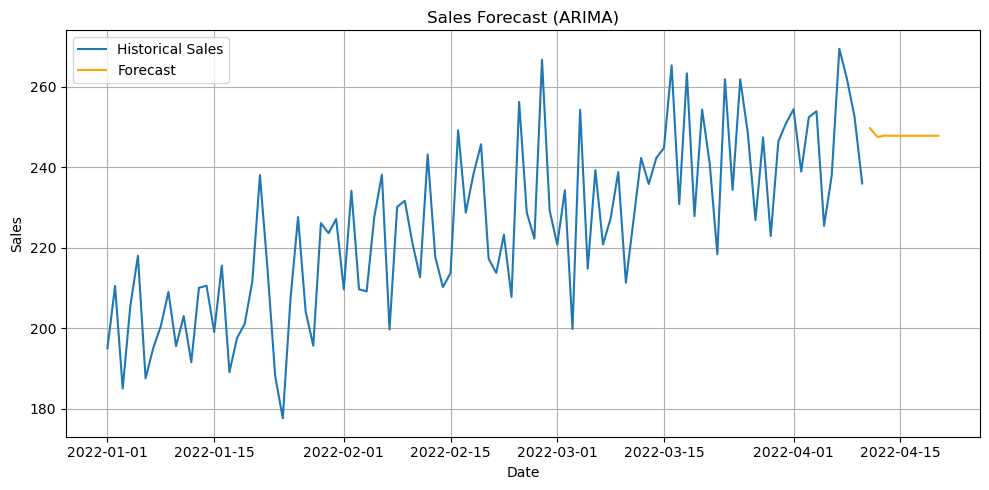

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error
sales_data = pd.read_csv("C:/Users/LENOVO/Downloads/New folder/sales_data1.csv", parse_dates=["Date"], dayfirst=True)
sales_data.set_index("Date", inplace=True)
sales_data = sales_data.asfreq('D')  # ⬅️ Set daily frequency to avoid warnings
adf_result = adfuller(sales_data['Sales'])
print(f"ADF p-value: {adf_result[1]}")
model = ARIMA(sales_data['Sales'], order=(1, 1, 1))
model_fit = model.fit()
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)
last_date = sales_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps)
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted_Sales': forecast.values
})
print("\nForecasted Sales:\n", forecast_df)
train = sales_data[:-forecast_steps]
test = sales_data[-forecast_steps:]
model_eval = ARIMA(train['Sales'], order=(1, 1, 1)).fit()
pred = model_eval.forecast(steps=forecast_steps)
rmse = root_mean_squared_error(test['Sales'], pred)
mape = mean_absolute_percentage_error(test['Sales'], pred)
print(f"\nRMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2%}")
plt.figure(figsize=(10, 5))
plt.plot(sales_data, label="Historical Sales")
plt.plot(forecast_df['Date'], forecast_df['Forecasted_Sales'], label="Forecast", color='orange')
plt.title("Sales Forecast (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
